# Amazon Top 50 Bestselling Books 2009 - 2019
## by (Eslam Ali Aboushashaa)
# Description the data
#### Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads this data from kaggle


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("bestsellers with categories.csv")
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
df.shape

(550, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Univariate Exploration


# Q: What price is most selling? 
I noted the common price is  in average between [4, 20]

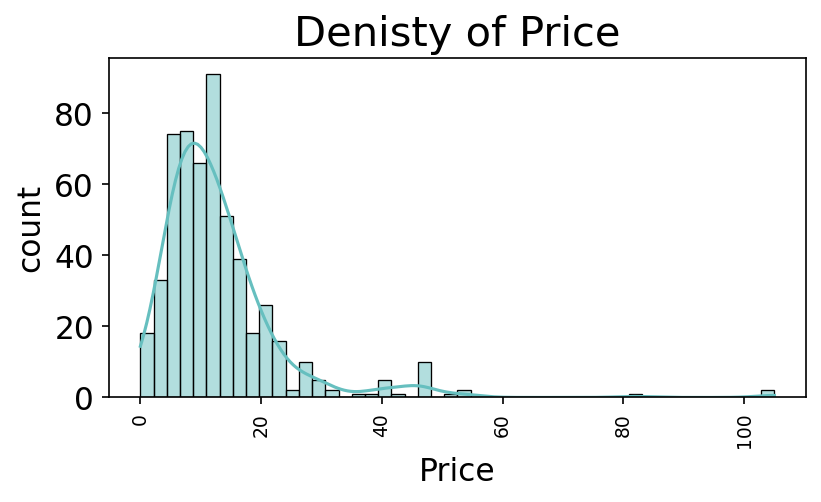

In [6]:
plt.figure(figsize=(6,3),dpi=150)

sns.histplot(data=df , x="Price", kde=True, color =  "#66BFBF")
plt.title('Denisty of Price', fontsize=20)

plt.xlabel('Price' , fontsize=15)
plt.ylabel('count' , fontsize=15)

plt.xticks(fontsize= 9 , rotation = 90)
plt.yticks(fontsize=15)
plt.show()

### I noted the common price is  in average between [4, 20]

# Q:What is the number of iterations in the review?
most commonly rating show in between [4.6, 4,8], i noted no_book have rate 5 some best seller books have bad rating, through that people don't like all bestseller

In [7]:
user_rating =df["User Rating"].value_counts()

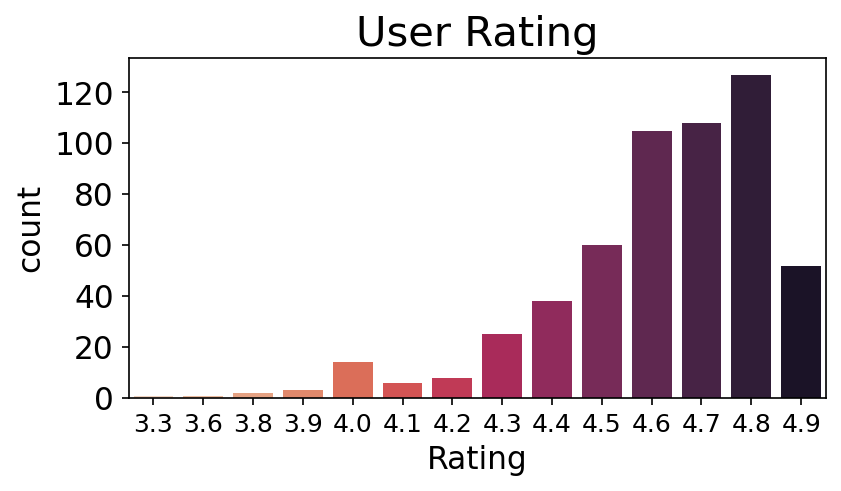

In [8]:
plt.figure(figsize=(6,3),dpi=150)

sns.countplot(data=df , x="User Rating", palette = "rocket_r")

plt.title('User Rating', fontsize=20)

plt.xlabel('Rating' , fontsize=15)
plt.ylabel('count' , fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.show()

most commnly rating show in between [4.6, 4,8], i noted no_book have rate  5
some best sellar books have bad rating, throug that pople don't like all best sellar

# Q2:which type of books is more selling ?
we can note the non fiction is more selling 

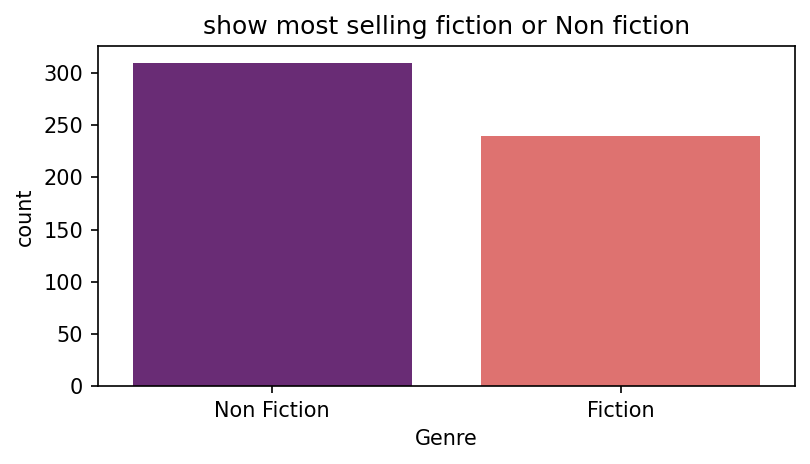

In [9]:
plt.figure(figsize=(6,3),dpi=150)
sns.countplot(data=df , x =  "Genre" ,palette="magma").set_title("show most selling fiction or Non fiction");


we can note the non fiction is more selling 

# Bivariate Exploration

# Do i find relation between User rating, Reniews, Price, Year?
I can't find any relation beween any variable

In [10]:
# iwant to know, Do i find relation between User rating, Reniews, Price, Year
numeric_value = ["User Rating", "Reviews","Price","Year"]

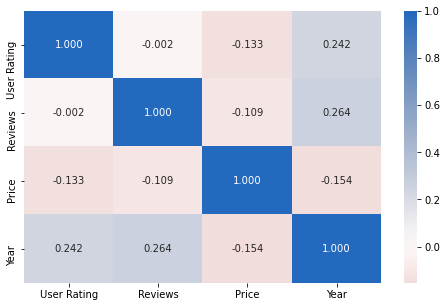

In [11]:
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_value].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

I can't find any relation beween any variable

# Q3: What are the price changes for each year ?
in last 3 year the book's price is lower

In [12]:
df_year = df.groupby(by = "Year")


In [13]:
df_mean_price = df_year["Price"].mean().to_frame()


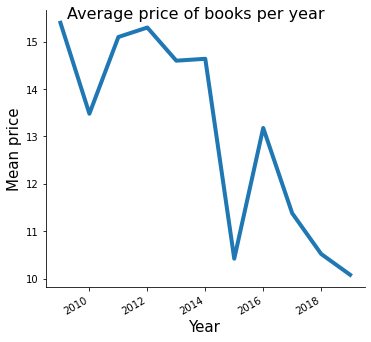

In [14]:
#i want to create graph, show realation between year and mean price but
#sns.relplot(x="year", y="mean_price", data=create_df1);
g = sns.relplot(x="Year", y = "Price", kind="line", data=df_mean_price , linewidth = 4)
g.fig.autofmt_xdate()
g.fig.suptitle("Average price of books per year", fontsize=16)
plt.xlabel("Year" , fontsize=15)
plt.ylabel('Mean price' , fontsize=15)
plt.show()

in last 3 year the book's price is lower

# Show information about price
The average price for a fiction book is lower than the average price for a non-fiction book

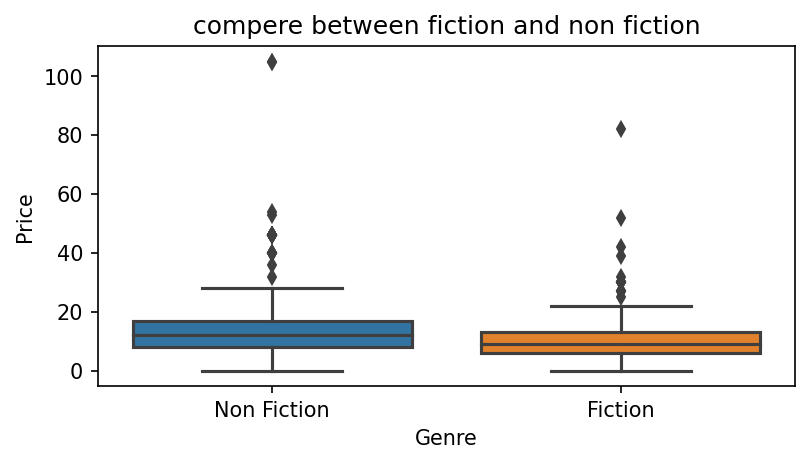

In [15]:
# i  will use box plot to show information about genre and price
plt.figure(figsize=(6,3),dpi=150)
b = sns.boxplot( x=df["Genre"], y=df["Price"] ).set_title("compere between fiction and non fiction")

 The average price for a fiction book is lower than the average price for a non-fiction book

# Q4: What happens when the price goes up in relation to reviews?
when the price increase, User Reviesws is lower 

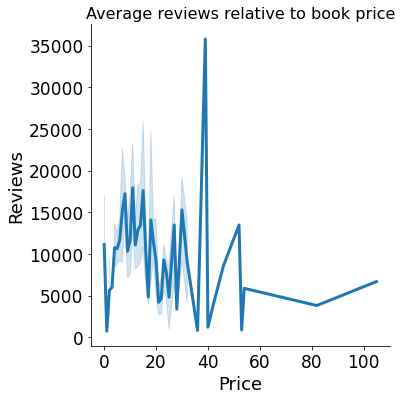

In [16]:
sns.relplot(x="Price", y="Reviews", kind="line", data=df, linewidth = 3)
plt.title('Average reviews relative to book price', fontsize= 16)
plt.xlabel("Price" , fontsize=18)
plt.ylabel('Reviews' , fontsize=18)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

when the price increase, User Reviesws is lower 

# Q4: What happens when the price goes up in relation to User Rating?
I note all books which have high User rating the price lower than 15$

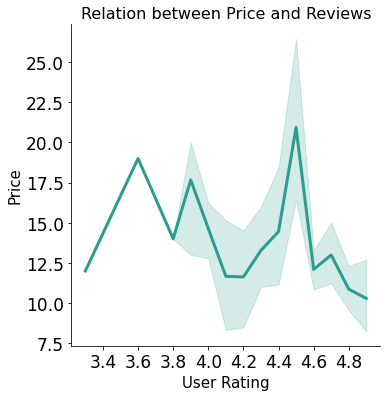

In [17]:
sns.relplot(x = 'User Rating', y = 'Price', data = df, kind = 'line', 
            color ='#2a9d8f' , linewidth = 3)

plt.title('Relation between Price and Reviews',fontsize= 16)

plt.xlabel("User Rating" , fontsize=15)
plt.ylabel("Price" , fontsize=15)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [18]:
# i want to select the books which have price is over 30 
df_over_30 = df.loc[df["Price" ] >  30]

# Q5: when price is over 30, Have the books became high rating?
Being an expensive book is not a requirement that it be likable 

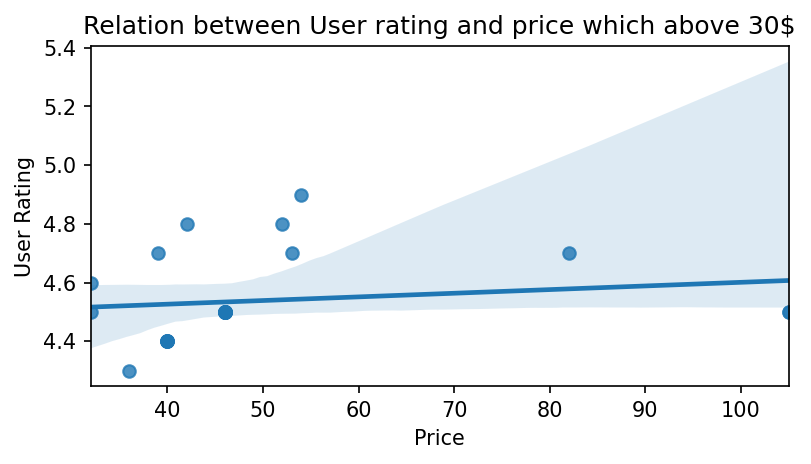

In [19]:
# i want to know when price is increases , rating is incresses also
plt.figure(figsize=(6,3),dpi=150)
sns.regplot(x=df_over_30["Price"], y=df_over_30["User Rating"]).set_title("Relation between User rating and price which above 30$");

Being an expensive book is not a requirement that it be likable 

# Multivariate Exploration


# General information about data
most good charachtar is focus when book's price is  [20 to 50] $ 
Slide Type

Fictional books are more popular than non-fiction books. Fictional books have more bad reviews than non-fiction books.


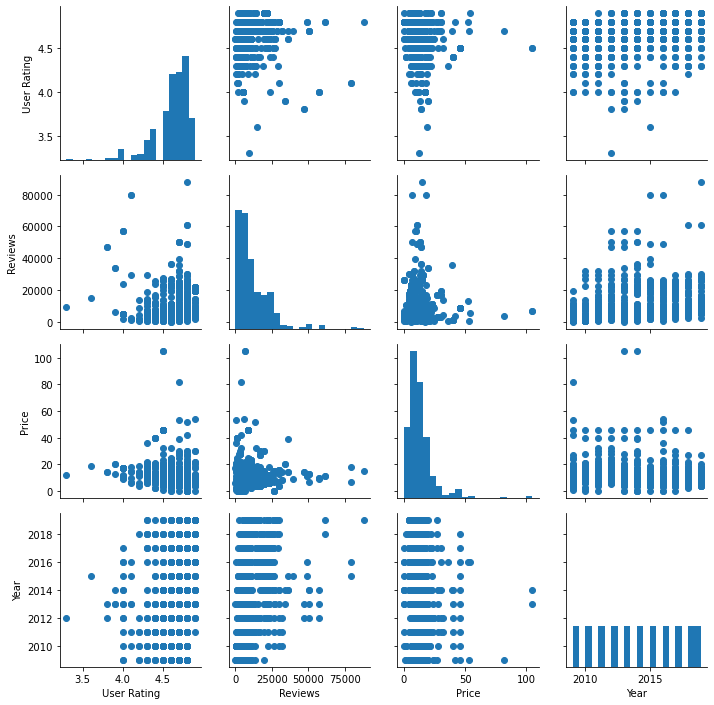

In [20]:
g = sns.PairGrid(data = df)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

most good charachtar is focus when book's price is  [20 to 50] $ 

# Does the number of reviews depend on the rating and type of book?
Fictional books are more popular than non-fiction books.
Fictional books have more bad reviews than non-fiction books.

<Figure size 900x450 with 0 Axes>

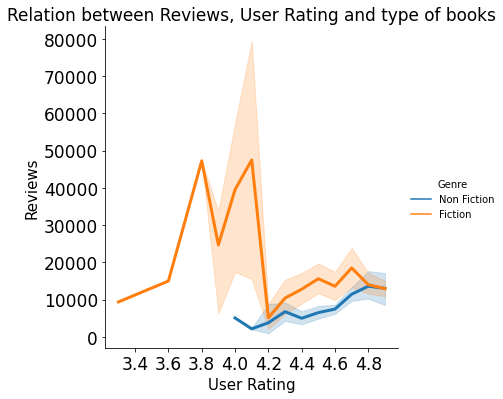

In [21]:
plt.figure(figsize=(6,3),dpi=150)
g = sns.relplot(x="User Rating", y="Reviews", hue="Genre", kind="line", data=df, linewidth = 3)
#g.fig.suptitle("Relation between reviews and type of books", fontsize=16);
plt.title('Relation between Reviews, User Rating and type of books', fontsize = 17)
plt.xlabel("User Rating" , fontsize=15)
plt.ylabel('Reviews' , fontsize=15)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# Q6: What are the prices for the type of books per year ?
Non-fiction books are always more expensive than fiction books

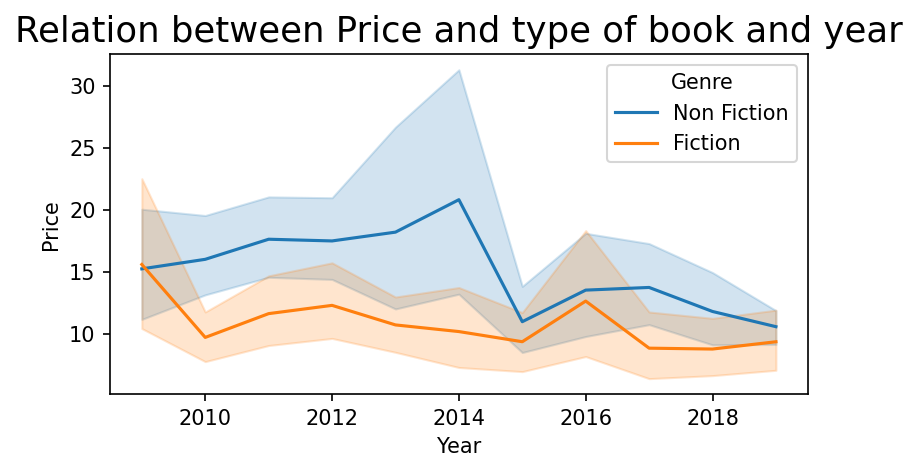

In [22]:
plt.figure(figsize=(6,3),dpi=150)

sns.lineplot(data=df, y="Price", x="Year", hue="Genre", palette = "tab10")
plt.title('Relation between Price and type of book and year', fontsize = 17)
plt.show()

Non-fiction books are always more expensive than fiction books

# Q7: What are the Reviews for the type of books per year ?
Fiction books are always more have Reviews.

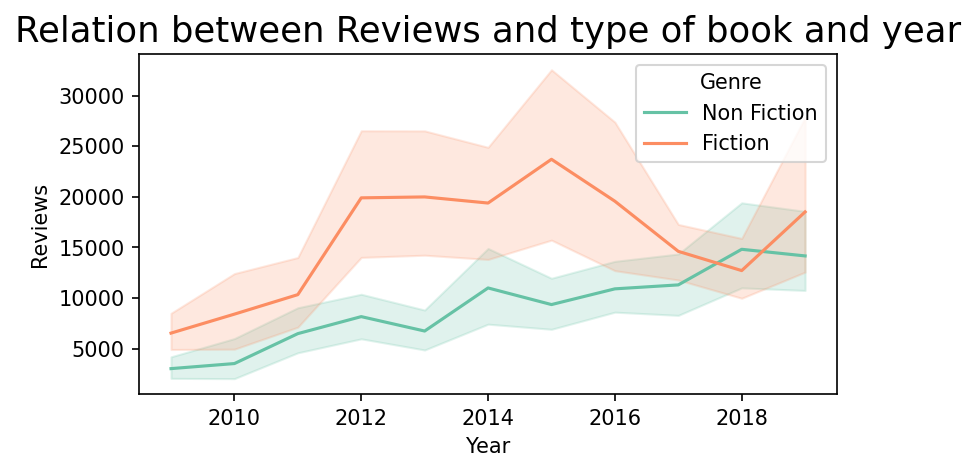

In [23]:
plt.figure(figsize=(6,3),dpi=150)

sns.lineplot(data=df, y="Reviews", x="Year", hue="Genre", palette = "Set2")

plt.title('Relation between Reviews and type of book and year', fontsize = 17)

plt.show()

Fiction books are always more have Reviews.